In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("weather_sample.csv",nrows=5,na_values=["na","NaN"],parse_dates=["day"])
df.drop("Unnamed: 0",axis=1,inplace=True)

## fillna() method

### fill any specific value

In [2]:
df.dtypes
df.fillna({"day":"1/1/2019","event":"no event","temperature":30.0})

,day,temperature,event
0,2017-01-01,32 C,Rain
1,2017-01-02,35,Sunny
2,2017-01-03,28 F,no event
3,2019-01-01,30.0,Snow


In [3]:
pd.to_datetime(df["day"],errors="coerce")

0   2017-01-01
1   2017-01-02
2   2017-01-03
3          NaT
Name: day, dtype: datetime64[ns]

### Fill previous written value calles forward fill(ffill)

In [4]:
x=df.fillna(method="ffill")
x

,day,temperature,event
0,2017-01-01,32 C,Rain
1,2017-01-02,35,Sunny
2,2017-01-03,28 F,Sunny
3,2017-01-03,28 F,Snow


### Fill next written value calles backward fill(bfill)

In [5]:
df.fillna(method="bfill")

,day,temperature,event
0,2017-01-01,32 C,Rain
1,2017-01-02,35,Sunny
2,2017-01-03,28 F,Snow
3,NaT,NaN,Snow


In [6]:
## you can also add limit into fillna method by -
df.fillna(method="ffill",limit=1)

,day,temperature,event
0,2017-01-01,32 C,Rain
1,2017-01-02,35,Sunny
2,2017-01-03,28 F,Sunny
3,2017-01-03,28 F,Snow


In [7]:
df

,day,temperature,event
0,2017-01-01,32 C,Rain
1,2017-01-02,35,Sunny
2,2017-01-03,28 F,NaN
3,NaT,NaN,Snow


### fill an average value of previous and next column in NaN cell

In [8]:
df1=pd.read_csv("Sample2.csv")
df2=df1.interpolate()
df2

,SR.,NAME,GENDER,AGE,DATE,COUNTRY
0,1.0,Dett,Male,18.0,21/05/2015,Great Britain
1,2.0,Nern,Female,19.0,15/10/2017,France
2,3.0,Kallsie,Male,20.0,16/08/2016,France
3,4.0,Siuau,Female,21.0,21/05/2015,Great Britain
4,5.0,Shennice,Male,22.0,21/05/2016,France
...,...,...,...,...,...,...
15718,2561.0,NaN,NaN,50.0,NaN,NaN
15719,2561.0,NaN,NaN,50.0,NaN,NaN
15720,2561.0,NaN,NaN,50.0,NaN,NaN
15721,2561.0,NaN,NaN,50.0,NaN,NaN


### dropna() method with thresh parameter

In [9]:
df.dropna(thresh=1) #it checks only one valid column in datafram, if not there it'll delete the whole row.

,day,temperature,event
0,2017-01-01,32 C,Rain
1,2017-01-02,35,Sunny
2,2017-01-03,28 F,NaN
3,NaT,NaN,Snow


### Replace any value in dataframe

In [10]:
df.replace("Rain","Rainy")

,day,temperature,event
0,2017-01-01,32 C,Rainy
1,2017-01-02,35,Sunny
2,2017-01-03,28 F,NaN
3,NaT,NaN,Snow


> replace multiple values

In [11]:
df.replace(["Rain","Sunny"],["Rainy","Sunny Day"])

,day,temperature,event
0,2017-01-01,32 C,Rainy
1,2017-01-02,35,Sunny Day
2,2017-01-03,28 F,NaN
3,NaT,NaN,Snow


> replace value for a specific column

In [12]:
df.replace({"temperature":32,"event":"Sunny"},np.NaN)

,day,temperature,event
0,2017-01-01,32 C,Rain
1,2017-01-02,35,NaN
2,2017-01-03,28 F,NaN
3,NaT,NaN,Snow


In [13]:
df.replace({32:37,"Sunny":"Sunny Day"})

,day,temperature,event
0,2017-01-01,32 C,Rain
1,2017-01-02,35,Sunny Day
2,2017-01-03,28 F,NaN
3,NaT,NaN,Snow


### Replace any value using regex pattern like unit of any data

In [15]:
df.replace({"temperature":"[A-Za-z]"},"",regex=True)

,day,temperature,event
0,2017-01-01,32,Rain
1,2017-01-02,35,Sunny
2,2017-01-03,28,NaN
3,NaT,NaN,Snow


In [16]:
df = pd.DataFrame({
'score': ['exceptional', 'average', 'good', 'poor', 'average', 'exceptional'],
'student': ['rob', 'maya', 'parthiv', 'tom', 'julian', 'erica']
})
df

,score,student
0,exceptional,rob
1,average,maya
2,good,parthiv
3,poor,tom
4,average,julian
5,exceptional,erica


In [17]:
df.replace([ 'poor', 'average', 'good', 'exceptional'], [1,2,3,4])

,score,student
0,4,rob
1,2,maya
2,3,parthiv
3,1,tom
4,2,julian
5,4,erica


In [18]:
df=pd.read_csv("Automobile_data.csv")

In [19]:
df

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...
56,81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
57,82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
58,86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0
59,87,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0


In [22]:
g=df.groupby("body-style")
g

In [26]:
for body_style, bodyStyle_df in g:
    print(body_style)
    print(bodyStyle_df)

convertible
    index      company   body-style  wheel-base  length engine-type  \
0       0  alfa-romero  convertible        88.6   168.8        dohc   
1       1  alfa-romero  convertible        88.6   168.8        dohc   
46     62      porsche  convertible        89.5   168.9        ohcf   

   num-of-cylinders  horsepower  average-mileage    price  
0              four         111               21  13495.0  
1              four         111               21  16500.0  
46              six         207               17  37028.0  
hardtop
    index        company body-style  wheel-base  length engine-type  \
35     47  mercedes-benz    hardtop       112.0   199.2        ohcv   
45     61        porsche    hardtop        89.5   168.9        ohcf   

   num-of-cylinders  horsepower  average-mileage    price  
35            eight         184               14  45400.0  
45              six         207               17  34028.0  
hatchback
    index      company body-style  wheel-base  leng

### Access any specific data group through object

In [27]:
g.get_group("sedan")

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
5,5,audi,sedan,99.8,177.3,ohc,five,110,19,15250.0
7,9,bmw,sedan,101.2,176.8,ohc,four,101,23,16430.0
8,10,bmw,sedan,101.2,176.8,ohc,four,101,23,16925.0
9,11,bmw,sedan,101.2,176.8,ohc,six,121,21,20970.0
10,13,bmw,sedan,103.5,189.0,ohc,six,182,16,30760.0
11,14,bmw,sedan,103.5,193.8,ohc,six,182,16,41315.0
12,15,bmw,sedan,110.0,197.0,ohc,six,182,15,36880.0
15,18,chevrolet,sedan,94.5,158.8,ohc,four,70,38,6575.0


> get maximum value of each column which comes under a particular group 

In [28]:
g.max()

,index,company,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
body-style,,,,,,,,,
convertible,62,porsche,89.5,168.9,ohcf,six,207,21,37028.0
hardtop,61,porsche,112.0,199.2,ohcv,six,207,17,45400.0
hatchback,68,toyota,98.4,175.7,rotor,two,288,47,16500.0
sedan,87,volvo,120.9,208.1,ohcv,twelve,262,45,41315.0
wagon,88,volvo,110.0,192.7,ohc,six,156,31,28248.0


In [29]:
g.min()

,index,company,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
body-style,,,,,,,,,
convertible,0,alfa-romero,88.6,168.8,dohc,four,111,17,13495.0
hardtop,47,mercedes-benz,89.5,168.9,ohcf,eight,184,14,34028.0
hatchback,2,alfa-romero,88.4,141.1,dohcv,eight,48,17,5151.0
sedan,3,audi,94.3,155.9,dohc,eight,52,13,6575.0
wagon,6,audi,94.5,157.1,dohc,five,62,19,6918.0


In [30]:
g.mean()

C:\Users\PC\AppData\Local\Temp\ipykernel_8340\2978112660.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g.mean()


,index,wheel-base,length,horsepower,average-mileage,price
body-style,,,,,,
convertible,21.000000,88.900000,168.833333,143.000000,19.666667,22341.000000
hardtop,54.000000,100.750000,184.050000,195.500000,15.500000,39714.000000
hatchback,39.133333,94.153333,159.700000,88.200000,30.466667,7159.571429
sedan,38.281250,100.756250,177.884375,112.562500,24.937500,17706.333333
wagon,56.777778,100.300000,177.400000,92.666667,25.444444,12730.111111


In [31]:
g.describe()

index                                                        \
            count       mean        std   min    25%   50%    75%   max   
body-style                                                                
convertible   3.0  21.000000  35.510562   0.0   0.50   1.0  31.50  62.0   
hardtop       2.0  54.000000   9.899495  47.0  50.50  54.0  57.50  61.0   
hatchback    15.0  39.133333  21.226219   2.0  19.50  38.0  56.50  68.0   
sedan        32.0  38.281250  25.530797   3.0  14.75  33.5  53.25  87.0   
wagon         9.0  56.777778  26.456463   6.0  45.00  69.0  71.00  88.0   

            wheel-base              ... average-mileage       price  \
                 count        mean  ...             75%   max count   
body-style                          ...                               
convertible        3.0   88.900000  ...           21.00  21.0   3.0   
hardtop            2.0  100.750000  ...           16.25  17.0   2.0   
hatchback         15.0   94.153333  ...           33.00  47.0  14.0   
sedan             32.0  100.756250  ...           31.00  45.0  30.0   
wagon              9.0  100.300000  ...           30.00  31.0   9.0   

                                                                              \
                     mean           std      min      25%      50%       75%   
body-style                                                                     
convertible  22341.000000  12807.750895  13495.0  14997.5  16500.0  26764.00   
hardtop      39714.000000   8041.218316  34028.0  36871.0  39714.0  42557.00   
hatchback     7159.571429   3150.916197   5151.0   5565.5   6262.0   6460.25   
sedan        17706.333333  11539.188151   6575.0   7980.0  13724.5  24406.50   
wagon        12730.111111   7245.294222   6918.0   7349.0   8778.0  15750.00   

                      
                 max  
body-style            
convertible  37028.0  
hardtop      45400.0  
hatchback    16500.0  
sedan        41315.0  
wagon        28248.0  

[5 rows x 48 columns]

body-style
convertible    Axes(0.125,0.11;0.775x0.77)
hardtop        Axes(0.125,0.11;0.775x0.77)
hatchback      Axes(0.125,0.11;0.775x0.77)
sedan          Axes(0.125,0.11;0.775x0.77)
wagon          Axes(0.125,0.11;0.775x0.77)
dtype: object

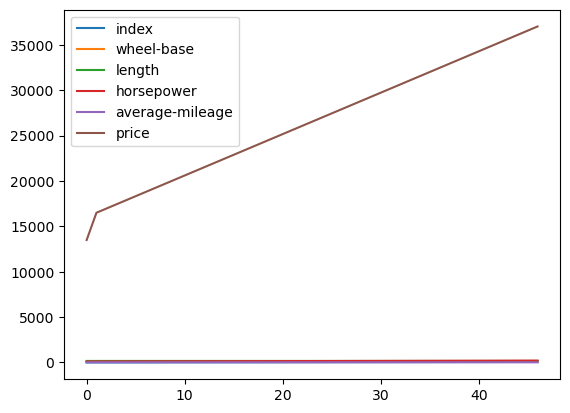

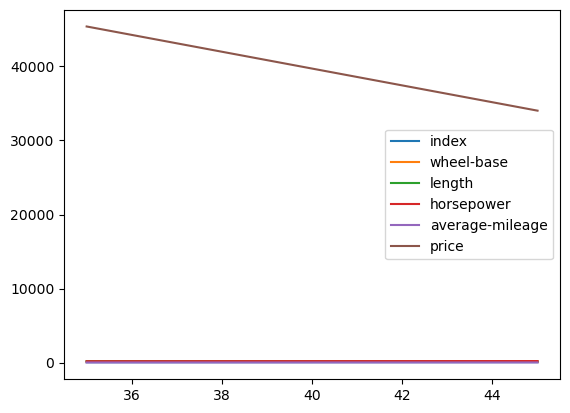

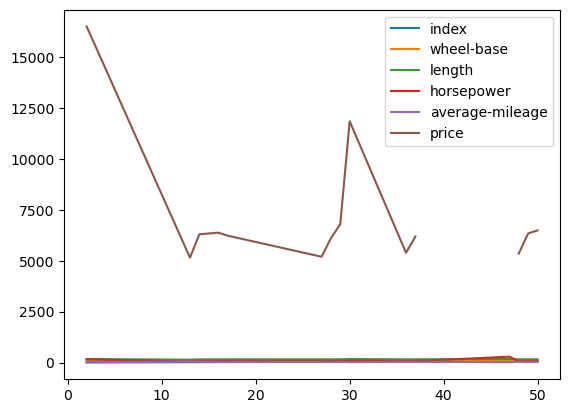

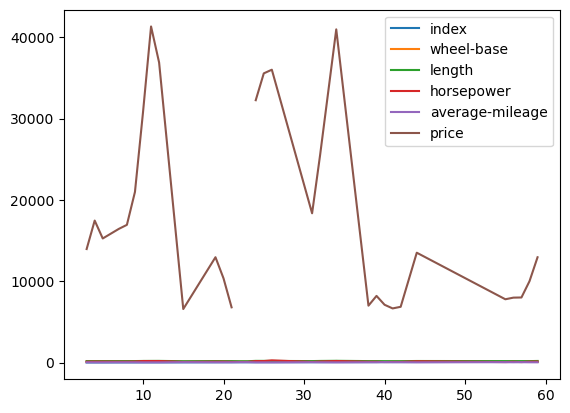

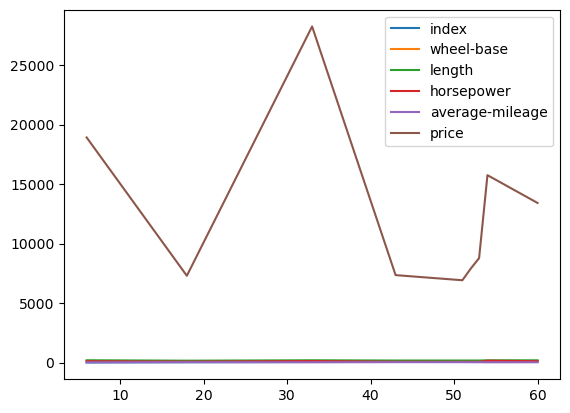

In [33]:
#%matplotlib inline
g.plot()

## Concate Dataframes

In [34]:
india_weather = pd.DataFrame({
"city": ["mumbai","delhi", "banglore"],
"temperature": [32,45,30],
"humidity": [80, 60, 78]
})
india_weather

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


In [35]:
us_weather = pd.DataFrame({
"city": ["new york", "chicago", "orlando"],
"temperature": [21,14,35],
"humidity": [68, 65, 75]
})
us_weather

,city,temperature,humidity
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


In [37]:
pd.concat([india_weather,us_weather])

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
0,new york,21,68
1,chicago,14,65
2,orlando,35,75


> You can have only single index by reseting these index

In [39]:
pd.concat([india_weather,us_weather],ignore_index=True)

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78
3,new york,21,68
4,chicago,14,65
5,orlando,35,75


> You can just pass the keys for better understaing and fast retrieval of data that has been concated.

In [42]:
df=pd.concat([india_weather,us_weather],keys=["India","USA"])
df

city  temperature  humidity
India 0    mumbai           32        80
      1     delhi           45        60
      2  banglore           30        78
USA   0  new york           21        68
      1   chicago           14        65
      2   orlando           35        75

In [43]:
df.loc["India"]

,city,temperature,humidity
0,mumbai,32,80
1,delhi,45,60
2,banglore,30,78


### Concat a series into Data frame 

In [47]:
s = pd. Series (["Humid", "Dry", "Rain"], name="event")
s

0    Humid
1      Dry
2     Rain
Name: event, dtype: object

In [49]:
pd.concat([us_weather,s],axis=1)

,city,temperature,humidity,event
0,new york,21,68,Humid
1,chicago,14,65,Dry
2,orlando,35,75,Rain
